## 2. Verifying the CLT & LLN

In [1]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Load the dataset
df = pd.read_csv("Data/winequality-red.csv")

In [3]:
# Select the variable to demonstrate the CLT
x = df['alcohol'].dropna().values  # Remove NaN values if any

In [4]:
# Define sample sizes
sample_sizes = [10, 50, 200, 500]

# Define number of resamples per sample size
num_samples = 10000

### CLT

Demonstrate CLT by drawing repeated samples of specified sample sizes and computing the sampling distribution for each.

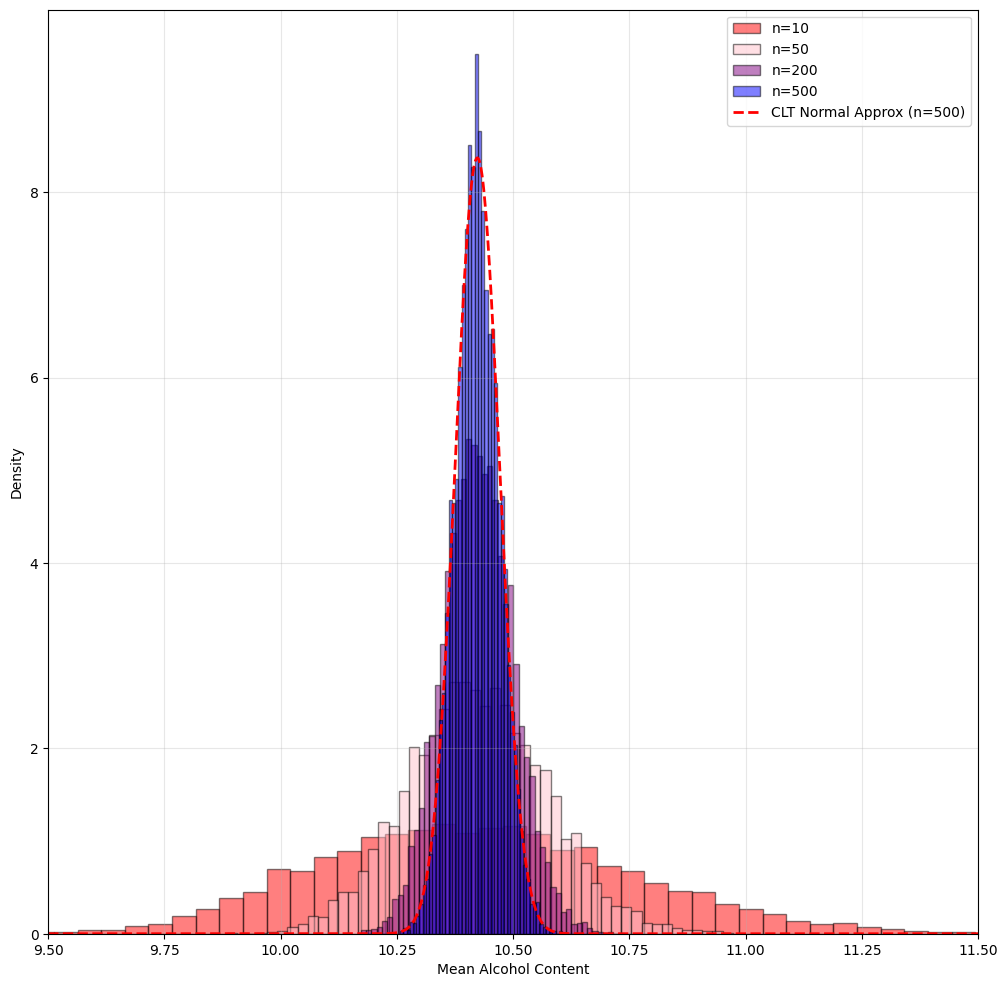

In [6]:
# Dictionary to store sample means
sample_means = {size: [] for size in sample_sizes}

# Generate sample means for each sample size
for size in sample_sizes:
    for _ in range(num_samples):
        sample = np.random.choice(x, size=size, replace=True)  # Bootstrap resampling
        sample_means[size].append(np.mean(sample))

# Compute population mean and standard deviation
pop_mean = np.mean(x)
pop_std = np.std(x, ddof=1)  # Sample standard deviation

# Plot: Superimposed distribution of sample means
plt.figure(figsize=(12, 12))

colors = ['red', 'pink',  'purple', 'blue']
for i, size in enumerate(sample_sizes):
    plt.hist(sample_means[size], bins=50, alpha=0.5, density=True, color=colors[i], label=f'n={size}', edgecolor='black')

# Plot the CLT Normal Approximation (n=1000)
x_values = np.linspace(9.5, 11.5, 1000)
y_values = stats.norm.pdf(x_values, loc=pop_mean, scale=pop_std / np.sqrt(500))
plt.plot(x_values, y_values, 'r--', label='CLT Normal Approx (n=500)', linewidth=2)

# Formatting
plt.xlabel("Mean Alcohol Content")
plt.ylabel("Density")
plt.xlim(9.5, 11.5)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### LLN - For a single simulation

Show how the running sample mean converges to the dataset mean over many iterations for a single run of the simulation.

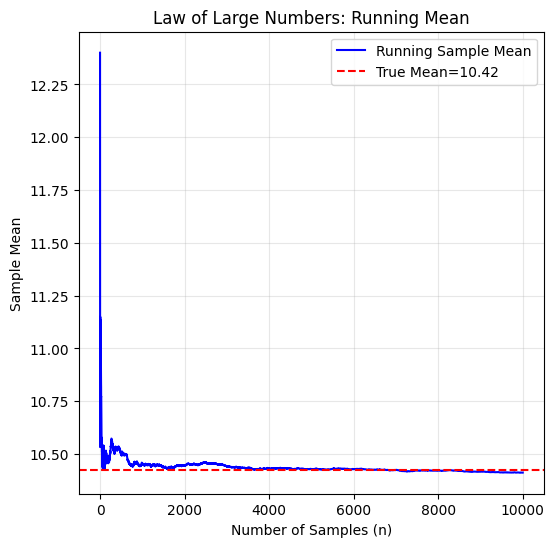

In [29]:
# Running sample mean storage
running_means = []
cumulative_sum = 0  # To track the sum of sampled values

# Compute running sample mean iteratively
for i in range(1, num_samples + 1):
    sample = np.random.choice(x, size=1, replace=True)  # Random sampling
    cumulative_sum += sample[0]  # Update sum
    running_means.append(cumulative_sum / i)  # Compute mean

# Compute the true population mean
pop_mean = np.mean(x)

# Plot: Law of Large Numbers (Convergence of Sample Mean)
plt.figure(figsize=(6, 6))
plt.plot(running_means, label="Running Sample Mean", color='blue')
plt.axhline(y=pop_mean, color='red', linestyle="dashed", label=f"True Mean={pop_mean:.2f}")

# Formatting
plt.xlabel("Number of Samples (n)")
plt.ylabel("Sample Mean")
plt.title("Law of Large Numbers: Running Mean")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### LLN - For Many Simulations

Show how the running sample mean converges to the dataset mean over many iterations for many runs of the simulation.

In [ ]:
# Number of simulations & iterations
num_simulations = 1000
num_samples = 10000

# Compute the true population mean
pop_mean = np.mean(x)

# Store all running means for corridor effect
all_running_means = np.zeros((num_simulations, num_samples))

# Plot: LLN Corridor Effect
plt.figure(figsize=(10, 6))

# Simulate 1000 LLN runs
for sim in range(num_simulations):
    running_means = []
    cumulative_sum = 0

    for i in range(1, num_samples + 1):
        sample = np.random.choice(x, size=1, replace=True)  # Random sampling
        cumulative_sum += sample[0]
        running_means.append(cumulative_sum / i)

    all_running_means[sim] = running_means

    plt.plot(all_running_means[sim], color='gray', alpha=0.1)



# # Plot all 1000 simulations in light gray (corridor effect)
# for i in range(num_simulations):
#     plt.plot(all_running_means[i], color='gray', alpha=0.1)

# True mean as a dashed line
plt.axhline(y=pop_mean, color='black', linestyle="dashed", linewidth=2, label=f"True Mean = {pop_mean:.2f}")

# Overlay one highlighted simulation
plt.plot(all_running_means[0], color='green', linewidth=1.5, label="Single Simulation")

# Mark the sample sizes at which slices are taken
plt.axvline(x=10, color='red', linestyle="dashed", linewidth=2, label="n = 10")
plt.axvline(x=50, color='pink', linestyle="dashed", linewidth=2, label="n = 50")
plt.axvline(x=200, color='purple', linestyle="dashed", linewidth=2, label="n = 20")
plt.axvline(x=500, color='blue', linestyle="dashed", linewidth=2, label="n = 500")



# Formatting
plt.xlabel("Size of Sample")
plt.ylabel("Empirical Mean")
plt.title("Law of Large Numbers: 1000 Simulations with One Highlighted")
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(9,11)
plt.show()

KeyboardInterrupt: 

(9.0, 11.0)

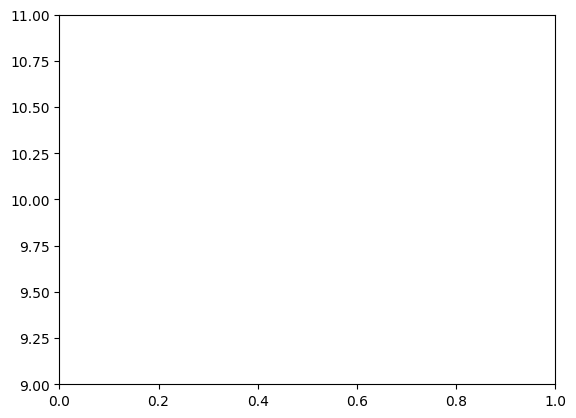

In [11]:
plt.ylim(9,11)